In [1]:
# Load EDA pkgs
import numpy as np
import pandas as pd

# Load Data Viz
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load ML tools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
df = pd.read_csv('../data/df_fake_real_news.csv')

In [3]:
df = df[df['text'].notnull()]
df = df.dropna()
df.reset_index(inplace=True)
#df = df.drop(axis=1, columns='level_0')
df.head(5)

,index,title,text,subject,date,category,length_text,length_title
0,0,donald trump send embarrass new year eve messa...,donald trump wish american happi new year leav...,News,736694,0,245,9
1,1,drunk brag trump staffer start russian collus ...,hous intellig committe chairman devin nune go ...,News,736694,0,178,8
2,2,sheriff david clark becom internet joke threat...,friday reveal former milwauke sheriff david cl...,News,736693,0,302,10
3,3,trump obsess even obama name code websit imag,christma day donald trump announc back work fo...,News,736692,0,230,8
4,4,pope franci call donald trump christma speech,pope franci use annual christma day messag reb...,News,736688,0,208,7


In [4]:
df = df.drop(axis=1, columns='index')
df

,title,text,subject,date,category,length_text,length_title
0,donald trump send embarrass new year eve messa...,donald trump wish american happi new year leav...,News,736694,0,245,9
1,drunk brag trump staffer start russian collus ...,hous intellig committe chairman devin nune go ...,News,736694,0,178,8
2,sheriff david clark becom internet joke threat...,friday reveal former milwauke sheriff david cl...,News,736693,0,302,10
3,trump obsess even obama name code websit imag,christma day donald trump announc back work fo...,News,736692,0,230,8
4,pope franci call donald trump christma speech,pope franci use annual christma day messag reb...,News,736688,0,208,7
...,...,...,...,...,...,...,...
38208,north korea shipment syria chemic arm agenc in...,unit nation two north korean shipment syrian...,worldnews,736562,1,274,10
38209,lexisnexi withdrew two product chines market,london lexisnexi provid legal regulatori bus...,worldnews,736563,1,73,6
38210,minsk cultur hub becom author,minsk shadow disus sovietera factori minsk s...,worldnews,736563,1,169,5
38211,vatican upbeat possibl pope franci visit russia,moscow vatican secretari state cardin pietro...,worldnews,736563,1,116,7


Comparing the length of the texts in fake_news and real_news

#### <span style="color:#003049">Splitting the dataframe</span>

In [5]:
Y = df["category"]

#### <span style="color:#003049">Making train and test data</span>

In [30]:
# Splitting the data into 70 percent train and 30 percent test
X_train, X_test, Y_train, Y_test = train_test_split(df["text"], Y, test_size=0.30, random_state=40)

### <span style="color:#306998">TF-IDF vectorizer</span>
<span style="color:#356F9F"> TF-IDF is an abbreviation for Term Frequency Inverse Document Frequency. This is very common algorithm to transform text into a meaningful representation of numbers which is used to fit machine algorithm for prediction.  </span> 

In [7]:
# Applying tfidf
tfidf_vect = TfidfVectorizer(max_df=0.7)
tfidf_train = tfidf_vect.fit_transform(X_train)
tfidf_test = tfidf_vect.transform(X_test)

In [8]:
print(tfidf_test)

  (0, 134129)	0.09453348921160656
  (0, 132138)	0.4673236822167867
  (0, 132095)	0.04509458511849182
  (0, 131742)	0.11506999173507512
  (0, 131267)	0.02729154242932437
  (0, 129743)	0.06390617374947524
  (0, 127535)	0.029092794479106666
  (0, 127363)	0.04526520912087752
  (0, 125111)	0.06451840214025442
  (0, 122389)	0.23537724654627112
  (0, 121942)	0.023956475031558455
  (0, 121288)	0.14559772062365656
  (0, 120690)	0.019177552367896984
  (0, 120575)	0.11281092895830072
  (0, 119937)	0.01881813574997406
  (0, 119806)	0.033262368833412305
  (0, 118594)	0.048373283401160684
  (0, 116426)	0.05018486906826967
  (0, 114696)	0.03140582965828987
  (0, 113395)	0.07431259945717567
  (0, 112251)	0.028073753338124684
  (0, 109407)	0.06632739822111297
  (0, 108226)	0.0408985064920819
  (0, 106560)	0.031963835685943354
  (0, 105620)	0.023901749994520462
  :	:
  (11463, 79353)	0.07657969226987908
  (11463, 76734)	0.1696453530638957
  (11463, 74227)	0.07900332934432015
  (11463, 73811)	0.083978081

In [9]:
print(tfidf_vect.get_feature_names()[-20:])

['zvizdic', 'zvizic', 'zwak', 'zweig', 'zweli', 'zwillich', 'zwillig', 'zwolinski', 'zxmgklb', 'zych', 'zygot', 'zyklon', 'zynga', 'zypri', 'zyuganov', 'zyuseragentifzxzbreak', 'zzzzaaaacccchhh', 'zzzzzzzz', 'zzzzzzzzzzzzz', 'émigré']


In [10]:
count_vect = CountVectorizer()
count_train = count_vect.fit_transform(X_train.values)
count_test = count_vect.transform(X_test.values)

In [11]:
print(count_test)

  (0, 520)	1
  (0, 844)	3
  (0, 1097)	2
  (0, 2284)	1
  (0, 5120)	1
  (0, 5743)	1
  (0, 6430)	1
  (0, 6714)	1
  (0, 7918)	2
  (0, 9165)	1
  (0, 9535)	1
  (0, 11377)	1
  (0, 17405)	1
  (0, 17718)	1
  (0, 19457)	1
  (0, 21111)	1
  (0, 21623)	1
  (0, 21722)	9
  (0, 21903)	2
  (0, 23817)	1
  (0, 24412)	3
  (0, 24599)	1
  (0, 24736)	1
  (0, 26266)	1
  (0, 26310)	1
  :	:
  (11463, 42874)	1
  (11463, 43777)	2
  (11463, 49815)	1
  (11463, 50676)	2
  (11463, 51899)	1
  (11463, 55084)	1
  (11463, 56125)	1
  (11463, 65614)	1
  (11463, 73811)	1
  (11463, 74227)	1
  (11463, 76734)	1
  (11463, 79353)	1
  (11463, 91401)	1
  (11463, 92176)	1
  (11463, 95706)	1
  (11463, 98590)	1
  (11463, 99290)	1
  (11463, 100978)	1
  (11463, 104150)	1
  (11463, 109017)	1
  (11463, 112314)	1
  (11463, 121943)	1
  (11463, 121949)	1
  (11463, 123127)	1
  (11463, 135540)	1


In [12]:
print(count_vect.get_feature_names()[0:10])

['aa', 'aaa', 'aaaahhhh', 'aaainnertextreplacernrngquotnquotelsevar', 'aab', 'aaba', 'aabo', 'aaccord', 'aachen', 'aadhaar']


## <span style="color:#003049">Machine learning</span>

In [13]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [14]:
#Applying Naive Bayes
clf = MultinomialNB() 
clf.fit(tfidf_train, Y_train)                       
pred = clf.predict(tfidf_test)                     
score = metrics.accuracy_score(Y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(Y_test, pred)
print(cm)

accuracy:   0.920
[[4445  768]
 [ 150 6101]]


In [15]:
print('Wrong predictions out of total')
print((Y_test !=pred).sum(),'/',((Y_test == pred).sum()+(Y_test != pred).sum()))
print('Percentage accuracy: ',100*accuracy_score(Y_test,pred))

Wrong predictions out of total
918 / 11464
Percentage accuracy:  91.99232379623167


In [16]:
## Plotting confusion matrix for TF-Idf vectorizer

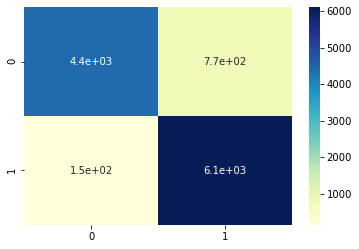

In [17]:
sns.heatmap(cm, cmap="YlGnBu", annot=True);

### <span style="color:#003049">Count Vectorized</span>

In [18]:
#Applying Naive Bayes
clf = MultinomialNB() 
clf.fit(count_train, Y_train)                       
pred1 = clf.predict(count_test)                    
score = metrics.accuracy_score(Y_test, pred1)
print("accuracy:   %0.3f" % score)
cm2 = metrics.confusion_matrix(Y_test, pred1)
print(cm2)

accuracy:   0.947
[[4888  325]
 [ 283 5968]]


In [19]:
print('Wrong predictions out of total')
print((Y_test !=pred1).sum(),'/',((Y_test == pred1).sum()+(Y_test != pred1).sum()))
print('Percentage accuracy: ',100*accuracy_score(Y_test,pred1))

Wrong predictions out of total
608 / 11464
Percentage accuracy:  94.69644103279833


In [20]:
## Plotting confusion matrix for Count vectorizer.

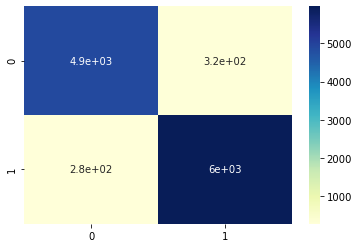

In [21]:
sns.heatmap(cm2, cmap="YlGnBu", annot=True);

## <span style="color:#003049">2. Random Forest Model</span>

In [22]:
from sklearn.ensemble import RandomForestClassifier

### <span style="color:#003049">TF-IDF Vectorized</span>

In [23]:
RF=RandomForestClassifier().fit(tfidf_train,Y_train)
#predict on train 
train_preds2 = RF.predict(tfidf_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds2))

#predict on test
test_preds2 = RF.predict(tfidf_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds2))
print('-'*50)



#Confusion matrix
print("confusion_matrix train is: ", metrics.confusion_matrix(Y_train, train_preds2))
print("confusion_matrix test is: ", metrics.confusion_matrix(Y_test, test_preds2))
print('Wrong predictions out of total')
print('-'*50)

# Wrong Predictions made.
print((Y_test !=test_preds2).sum(),'/',((Y_test == test_preds2).sum()+(Y_test != test_preds2).sum()))
print('-'*50)

Model accuracy on train is:  1.0
Model accuracy on test is:  0.9572575017445918
--------------------------------------------------
confusion_matrix train is:  [[12180     0]
 [    0 14569]]
confusion_matrix test is:  [[4874  339]
 [ 151 6100]]
Wrong predictions out of total
--------------------------------------------------
490 / 11464
--------------------------------------------------


### <span style="color:#003049">Count Vectorized</span>

In [24]:
RF=RandomForestClassifier().fit(count_train,Y_train)
#predict on train 
train_preds3 = RF.predict(count_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds3))

#predict on test
test_preds3 = RF.predict(count_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds3))
print('-'*50)



#Confusion matrix
print("confusion_matrix train is: ", metrics.confusion_matrix(Y_train, train_preds3))
print("confusion_matrix test is: ", metrics.confusion_matrix(Y_test, test_preds3))
print('Wrong predictions out of total')
print('-'*50)

# Wrong Predictions made.
print((Y_test !=test_preds3).sum(),'/',((Y_test == test_preds3).sum()+(Y_test != test_preds3).sum()))
print('-'*50)

Model accuracy on train is:  1.0
Model accuracy on test is:  0.9613572923935799
--------------------------------------------------
confusion_matrix train is:  [[12180     0]
 [    0 14569]]
confusion_matrix test is:  [[4869  344]
 [  99 6152]]
Wrong predictions out of total
--------------------------------------------------
443 / 11464
--------------------------------------------------


## <span style="color:#003049">K-Nearest Neighbour</span>

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
#fit the model on train data 
KNN = KNeighborsClassifier().fit(tfidf_train,Y_train)
#predict on train 
train_preds4 = KNN.predict(tfidf_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds4))

#predict on test
test_preds4 = KNN.predict(tfidf_test)
#accuracy on test
print("Model accuracy on test is:  ", accuracy_score(Y_test, test_preds4))
print('-'*50)

Model accuracy on train is:  0.8817899734569516
Model accuracy on test is:   0.8320830425680391
--------------------------------------------------


In [27]:
#Confusion matrix
print("confusion_matrix train is: ", metrics.confusion_matrix(Y_train, train_preds4))
print("confusion_matrix test is:  ", metrics.confusion_matrix(Y_test, test_preds4))
print('Wrong predictions out of total')
print('-'*50)

# Wrong Predictions made.
print((Y_test !=test_preds4).sum(),'/',((Y_test == test_preds4).sum()+(Y_test != test_preds4).sum()))

print('-'*50)

confusion_matrix train is:  [[ 9377  2803]
 [  359 14210]]
confusion_matrix test is:   [[3549 1664]
 [ 261 5990]]
Wrong predictions out of total
--------------------------------------------------
1925 / 11464
--------------------------------------------------


In [28]:
#fit the model on train data 
KNN = KNeighborsClassifier().fit(count_train,Y_train)
#predict on train 
train_preds5 = KNN.predict(count_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds5))

#predict on test
test_preds5 = KNN.predict(count_test)
#accuracy on test
print("Model accuracy on test is:  ", accuracy_score(Y_test, test_preds5))
print('-'*50)

Model accuracy on train is:  0.8088900519645594
Model accuracy on test is:   0.7526168876482903
--------------------------------------------------


In [29]:
#Confusion matrix
print("confusion_matrix train is: ", metrics.confusion_matrix(Y_train, train_preds5))
print("confusion_matrix test is:  ", metrics.confusion_matrix(Y_test, test_preds5))
print('Wrong predictions out of total')
print('-'*50)

# Wrong Predictions made.
print((Y_test !=test_preds5).sum(),'/',((Y_test == test_preds5).sum()+(Y_test != test_preds5).sum()))

print('-'*50)

confusion_matrix train is:  [[ 9109  3071]
 [ 2041 12528]]
confusion_matrix test is:   [[3550 1663]
 [1173 5078]]
Wrong predictions out of total
--------------------------------------------------
2836 / 11464
--------------------------------------------------


<span style="color:#003049">All models worked quite well. The best model performance was the Random Forest on Count Vectorized model with the following results:
    model accuracy on train:  1.0
    model accuracy on test:  0.96
    wrong prediction: 443 over 11464</span> 